# Using layout analysis

This example uses Textractor to predict layout components in a document page and return the text output in reading order.

## Installation

To begin, install the `amazon-textract-textractor` package using pip.

`pip install amazon-textract-textractor`

There are various sets of dependencies available to tailor your installation to your use case. The base package will have sensible default, but you may want to install the PDF extra dependencies if your workflow uses PDFs with `pip install amazon-textract-textractor[pdf]`. You can read more on extra dependencies [in the documentation](https://aws-samples.github.io/amazon-textract-textractor/installation.html)

## Calling Textract

In [1]:
import os
from PIL import Image
from textractor import Textractor
from textractor.visualizers.entitylist import EntityList
from textractor.data.constants import TextractFeatures

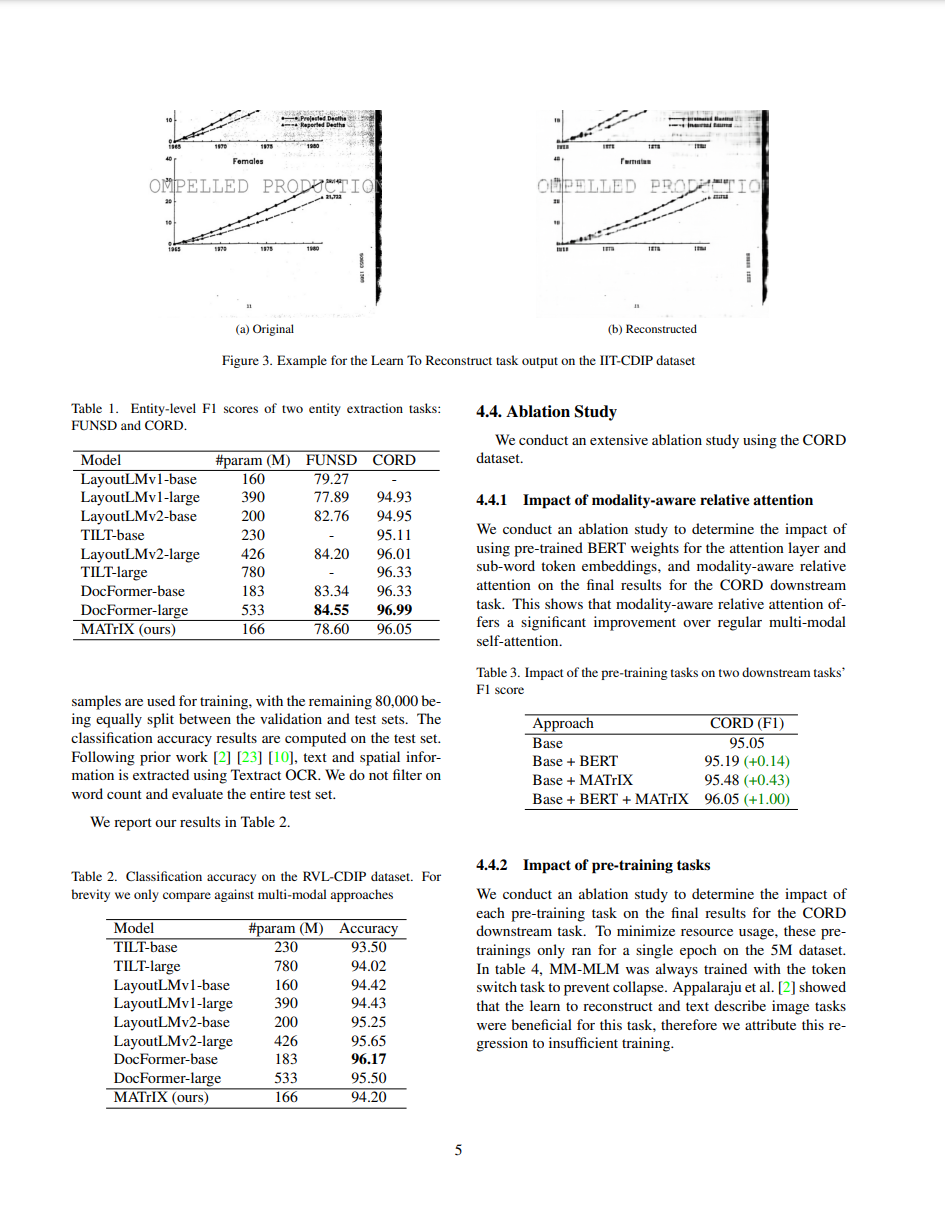

In [2]:
image = Image.open("../../../tests/fixtures/matrix.png").convert("RGB")
image

The image above, taken from a research paper, uses a two-column layout.

In [5]:
extractor = Textractor(region_name="us-west-2")

document = extractor.detect_document_text(
    file_source=image, 
    save_image=True
)

In [6]:
print(document.text)

Reported
1945
1970
1877
-
TETS
Females
famales
PELLED PRODUCTIO
OMPELLED PRODUCTIO
21,722
1965
1979
1971
1980
ITTA
-
(a) Original
(b) Reconstructed
Figure 3. Example for the Learn To Reconstruct task output on the IIT-CDIP dataset
Table 1. Entity-level F1 scores of two entity extraction tasks:
4.4. Ablation Study
FUNSD and CORD.
We conduct an extensive ablation study using the CORD
Model
#param (M)
FUNSD
CORD
dataset.
LayoutLMvl-base
160
79.27
-
LayoutLMvl-large
390
77.89
94.93
4.4.1 Impact of modality-aware relative attention
LayoutLMv2-base
200
82.76
94.95
TILT-base
230
95.11
We conduct an ablation study to determine the impact of
-
LayoutLMv2-large
426
84.20
96.01
using pre-trained BERT weights for the attention layer and
TILT-large
780
-
96.33
sub-word token embeddings, and modality-aware relative
DocFormer-base
183
83.34
96.33
attention on the final results for the CORD downstream
DocFormer-large
533
84.55
96.99
task. This shows that modality-aware relative attention of-
MATrIX (o

As we can see, the lack of layout awareness in the raw OCR output of the DetectDocumentText API causes the resulting text to be scrambled making it difficult to extract relevant information.

Instead, let's use the new Layout feature of the AnalyzeDocument API

In [7]:
document = extractor.analyze_document(
    file_source=image,
    features=[TextractFeatures.LAYOUT],
    save_image=True
)

In [8]:
print(document.text)

Reported

1945

1970

1877

Females

PELLED PRODUCTIO

21,722

1965

1979

1971

1980
(a) Original
-

TETS

famales

OMPELLED PRODUCTIO

ITTA

-
(b) Reconstructed
Figure 3. Example for the Learn To Reconstruct task output on the IIT-CDIP dataset
Table 1. Entity-level F1 scores of two entity extraction tasks: FUNSD and CORD.
Model	#param (M)	FUNSD	CORD
LayoutLMvl-base	160	79.27
-
LayoutLMvl-large	390	77.89	94.93
LayoutLMv2-base	200	82.76	94.95
TILT-base	230	-	95.11
LayoutLMv2-large	426	84.20	96.01
TILT-large	780	-	96.33
DocFormer-base	183	83.34	96.33
DocFormer-large	533	84.55	96.99
MATrIX (ours)	166	78.60	96.05

samples are used for training, with the remaining 80,000 be- ing equally split between the validation and test sets. The classification accuracy results are computed on the test set. Following prior work [2] [23] [10], text and spatial infor- mation is extracted using Textract OCR. We do not filter on word count and evaluate the entire test set.
We report our results in Table 2.

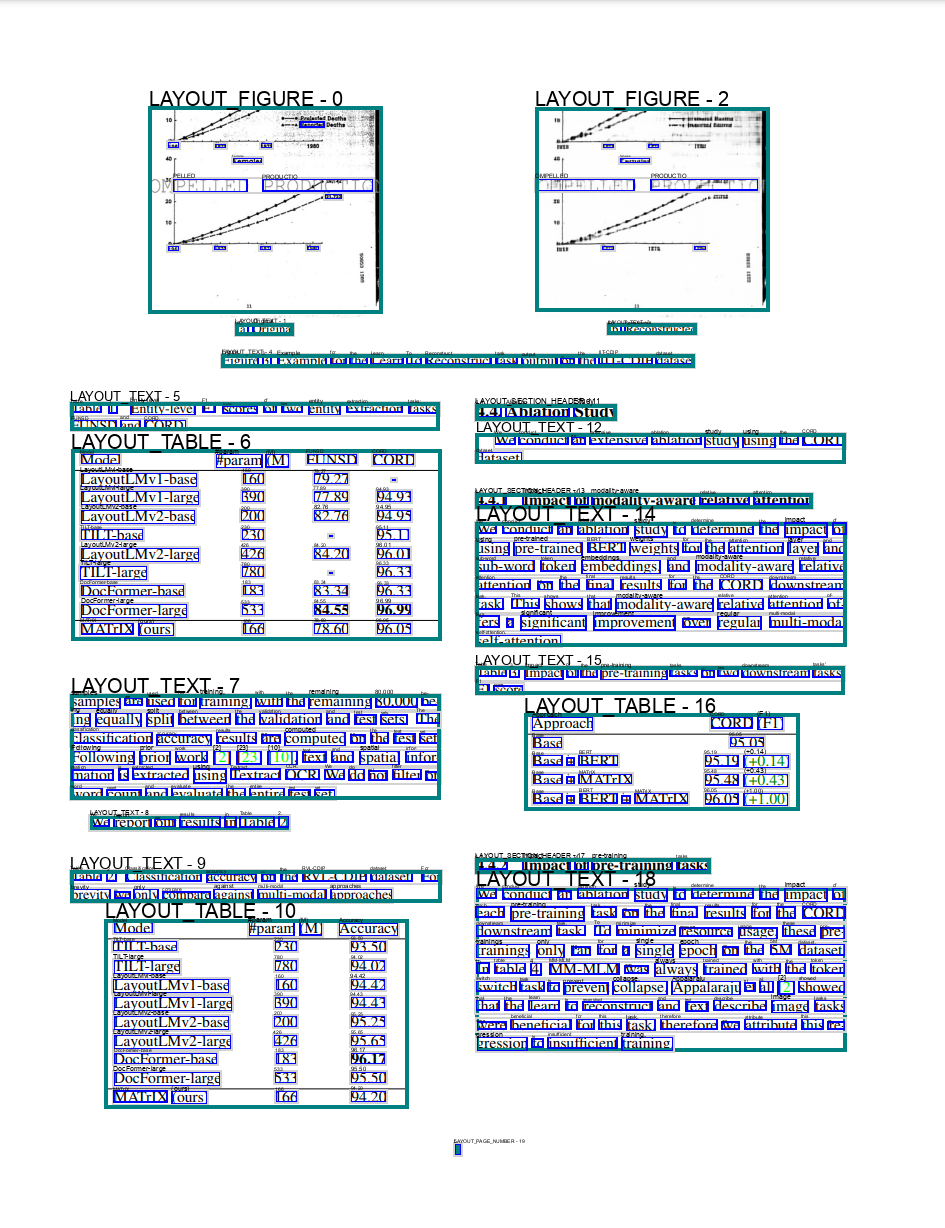

In [10]:
document.visualize().convert("RGB")

## Conclusion

By leveraging layout information, we can linearize the text in a way that is easier to read of both humans and LLMs. In the "Textractor for large language model" notebook, we explore how this can lead to greatly improved question answering capabilities.